# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


The dataset contains information about 10,000 movies collected from The Movie Database (TMDb), and contains:
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>popularity</li>
    <li>budget</li>
    <li>revenue</li>
    <li>original_title</li>
    <li>cast  [<b>Note:</b> contain multiple values separated by pipe (|) characters.]</li>
    <li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords [<b>Note:</b> contain multiple values separated by pipe (|) characters.]</li>
    <li>overview</li>
    <li>runtime</li>
    <li>genres [<b>Note:</b> contain multiple values separated by pipe (|) characters.]</li>
    <li>production_companies  [<b>Note:</b> contain multiple values separated by pipe (|) characters.]</li>
    <li>release_date</li>
    <li>vote_count</li>
    <li>vote_average</li>
    <li>release_year</li>
    <li>budget_adj [<b>Note:</b> the associated movie in terms of 2010 dollars]</li>
    <li>revenue_adj [<b>Note:</b> the associated movie in terms of 2010 dollars]</li>
</ul>


### Question(s) for Analysis

<ol>
    <li>What are the top 10 movies with certain keywords <i>like ('police', 'kidnapping')</i>?</li>
    <li>What are the top 10 production companies for the production of certain movie genre <i>like ('Horror')</i>?</li>
    <li>What is the best month to publish a certain movie genre <i>like ('Action')</i>?</li>
    <li>What is the level of movies over the years?</li>
    <li>What is the movie genre that has the biggest runtime_average?</li>
    <li>Who are the best duo of a certain movie genre <i>like ('Comedy')</i>?</li>

</ol> 

In [1]:
#Set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



### 1) General Properties


In [3]:
# Load the data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09



### 2) Data Cleaning

In [4]:
#print information about my dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#print describe about my dataframe
pd.DataFrame(df.describe())

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#clean the data from duplicates
df.drop_duplicates(inplace = True)

#convert 'release_date' string to datetime with use release_year for years
year = df['release_year'].astype(str)
month_day =  pd.to_datetime(df['release_date']).dt.strftime('%m%d')
df['release_date'] = pd.to_datetime(year + month_day, format='%Y%m%d')

#replace zero values to NaN 
df = df.replace({'0':np.nan, 0:np.nan})

#convert some series from string to list
df['keywords'] = df['keywords'].str.split('|')
df['genres'] = df['genres'].str.split('|')
df['production_companies'] = df['production_companies'].str.split('|')
df['cast'] = df['cast'].str.split('|')

Histogram to show the count to every genre


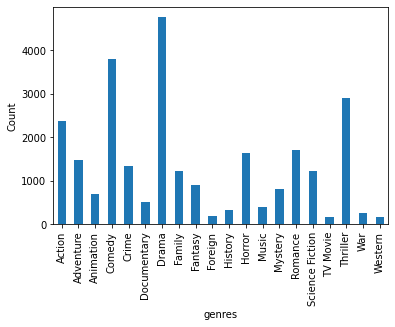

In [7]:
print("Histogram to show the count to every genre")
info1_df = df.explode('genres')

info1_df = info1_df.groupby(['genres'], dropna=True)['id'].count().plot(kind='bar').set_ylabel('Count')

In [8]:
def show_bar(
    x,
    y,
    xlabel,
    ylabel,
    x_fontsize,
    y_fontsize,
    title
):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(10)

    plt.title(title, fontsize=25)
    plt.xlabel(xlabel, fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.xticks(fontsize=x_fontsize)
    plt.yticks(fontsize=y_fontsize)

    plt.bar(x, y)

    plt.show();


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1) What are the top 10 movies with certain keywords like ('police', 'kidnapping')?

In [9]:
#The keywords that will research about them
key = ['police', 'kidnapping']
dic = {}

#explode keywords in dataframe
q1_df = df.explode('keywords')[['original_title','keywords', 'vote_average', 'overview']].sort_values('vote_average', ascending=False)
q1_df = q1_df[q1_df['keywords'].isin(key)]

#to know the movies that have keywords and numbers
for index, row in q1_df.iterrows():
    dic[row['original_title']] = dic.get(row['original_title'], 0) + 1

#sort the dictionary to take the biggest
dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
films = list(dic.keys())[:10]

In [10]:
#print the result
if len(films) == 0:
    print('There are no movies that match what you want!! Try again.')
else:  
    print(f"The top 10 movies with {key}:\n")
    for i, film in enumerate(films,1):
        print(f"{i}: {film}")
        print(f"-> Overview: {q1_df[q1_df['original_title'] == film].overview.values[0]}\n")

The top 10 movies with ['police', 'kidnapping']:

1: Les 7 jours du talion
-> Overview: Bruno Hamel is a thirty eight year old surgeon. He lives in Drummondville with his wife Sylvie, and their eight year-old daughter Jasmine. Like many happy people, he is leading an uneventful life until a beautiful fall afternoon, when his daughter is raped and murdered. From then on, the world of the Hamel family collapses. When the murderer is arrested, a terrible project germinates in Bruno's darkened mind. He plans to capture the "monster" and make him pay for his crime. The day the murderer appears in Court, Hamel, who had prepared his plan in great detail, kidnaps the monster and later sends the police a brief message stating that the rapist and murderer of his daughter was going to be tortured for 7 days and then executed. Once this task accomplished, he will then give himself up.

2: The Den
-> Overview: A young woman studying the habits of webcam chat users from the apparent safety of her ap

### Question 2)  What are the top 10 production companies for the production of certain movie genre like ('Horror')?

In [11]:
#The genre that will research about them
genre = 'Horror'

#explode production_companies and genres in dataframe
q2_df = df.explode('production_companies')
q2_df = q2_df.explode('genres')

#grouped genres and production_companies with popularity mean
q2_df = q2_df.groupby(['genres', 'production_companies'], dropna=True)['popularity'].mean().to_frame(name = 'mean_popularity').reset_index().sort_values('mean_popularity', ascending=False)

#to filter the movies that not the same genre
q2_df = q2_df[q2_df['genres'] == genre]

In [12]:
#print the result
i = 0

print(f"Best production_companies in {genre}:\n")
for index, row in q2_df.head(10).iterrows():
    i +=1
    print(f"{i}: {row['production_companies']} (with Mean popularity {row['mean_popularity']})\n")


Best production_companies in Horror:

1: UW4 Productions (with Mean popularity 7.031452)

2: Sketch Films (with Mean popularity 7.031452)

3: Scholastic Entertainment (with Mean popularity 3.644541)

4: Hasbro (with Mean popularity 3.489314)

5: Animal Kingdom (with Mean popularity 3.393741)

6: Northern Lights Films (with Mean popularity 3.393741)

7: Two Flints (with Mean popularity 3.393741)

8: New Legacy (with Mean popularity 3.326646)

9: Dentsu (with Mean popularity 3.028769)

10: Fuji Television Network (with Mean popularity 3.028769)



### Question 3)  What is the best month to publish a certain movie genre like ('Action')?

In [13]:
#The genre that will research about them
genre = 'Action'

months = ['January','February','March','April','May','June','July','August','September','October','November','December',]

#take the columns that we nead
q3_df = df.loc[: ,['release_date', 'popularity', 'genres']]

#take best rows
q3_df = q3_df[q3_df['popularity'] > q3_df['popularity'].mean()]
q3_df['release_date'] = q3_df['release_date'].dt.month
q3_df= q3_df.explode('genres').sort_values('popularity', ascending=False)

#grouped df by genres and release_date and calculate the count
q3_df = q3_df.groupby(['genres', 'release_date'], dropna=True).size().to_frame(name = 'count').reset_index()

#print the result
q3_df = q3_df[(q3_df['genres'] == genre)]

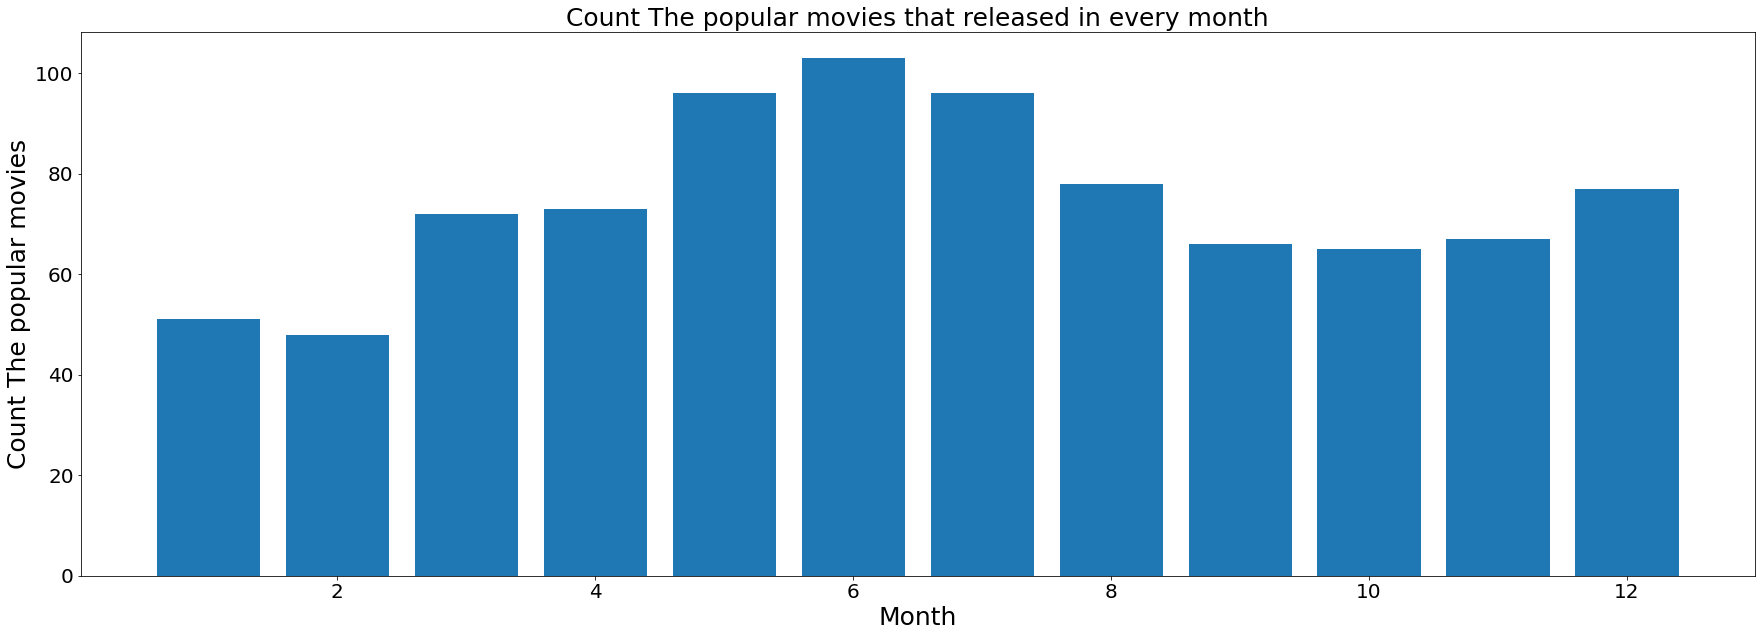

In [14]:
#show the result
show_bar(
    q3_df['release_date'],
    q3_df['count'],
    "Month",
    "Count The popular movies",
    20,
    20,
    "Count The popular movies that released in every month"
)



In [15]:
#print the result
q3_df = q3_df[(q3_df['count'] == q3_df['count'].max())]
print(f"The best month to publish a '{genre}' movie is: {months[q3_df['release_date'].values[0] - 1]}")

The best month to publish a 'Action' movie is: June


### Question 4)  What is the level of movies over the years?

In [16]:
#take the columns that we nead
q4_df = df.loc[: , ['release_year', 'vote_average']]

#grouped df by release_year and calculate the vote_average
q4_df = q4_df.groupby(['release_year'], dropna=True)['vote_average'].mean().to_frame(name = 'vote_average')#.sort_values('vote_average', ascending=False)

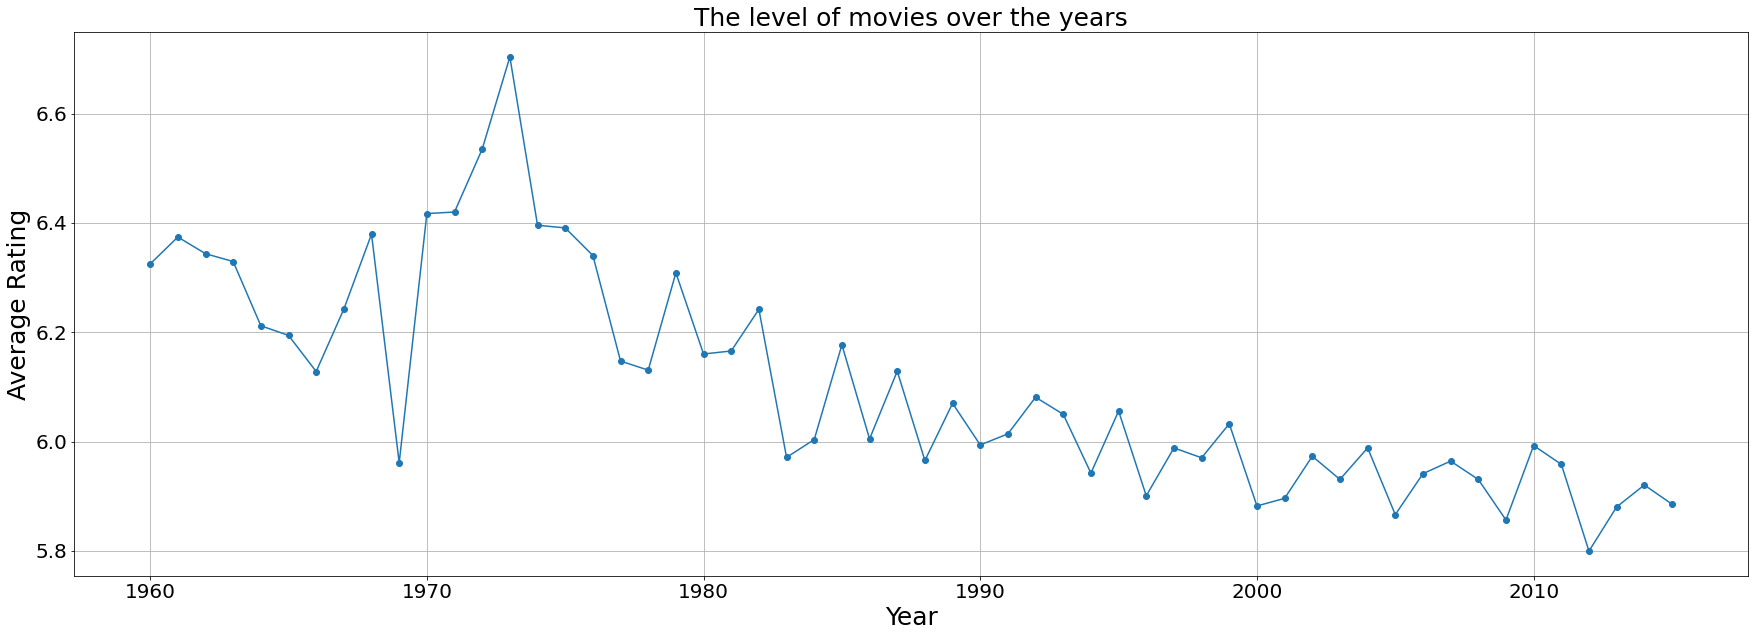

In [17]:
#show the result
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

plt.plot(q4_df, marker = 'o')

plt.title("The level of movies over the years", fontsize=25)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Average Rating", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

plt.show()

### Question 5)  What is the movie genre that has the biggest runtime_average?

In [18]:
#take the columns that we nead
q5_df = df.loc[: ,['genres', 'runtime']]
q5_df= q5_df.explode('genres')

#grouped df by genres and calculate the runtime_average
q5_df = q5_df.groupby(['genres'], dropna=True)['runtime'].mean().to_frame(name = 'runtime_average')

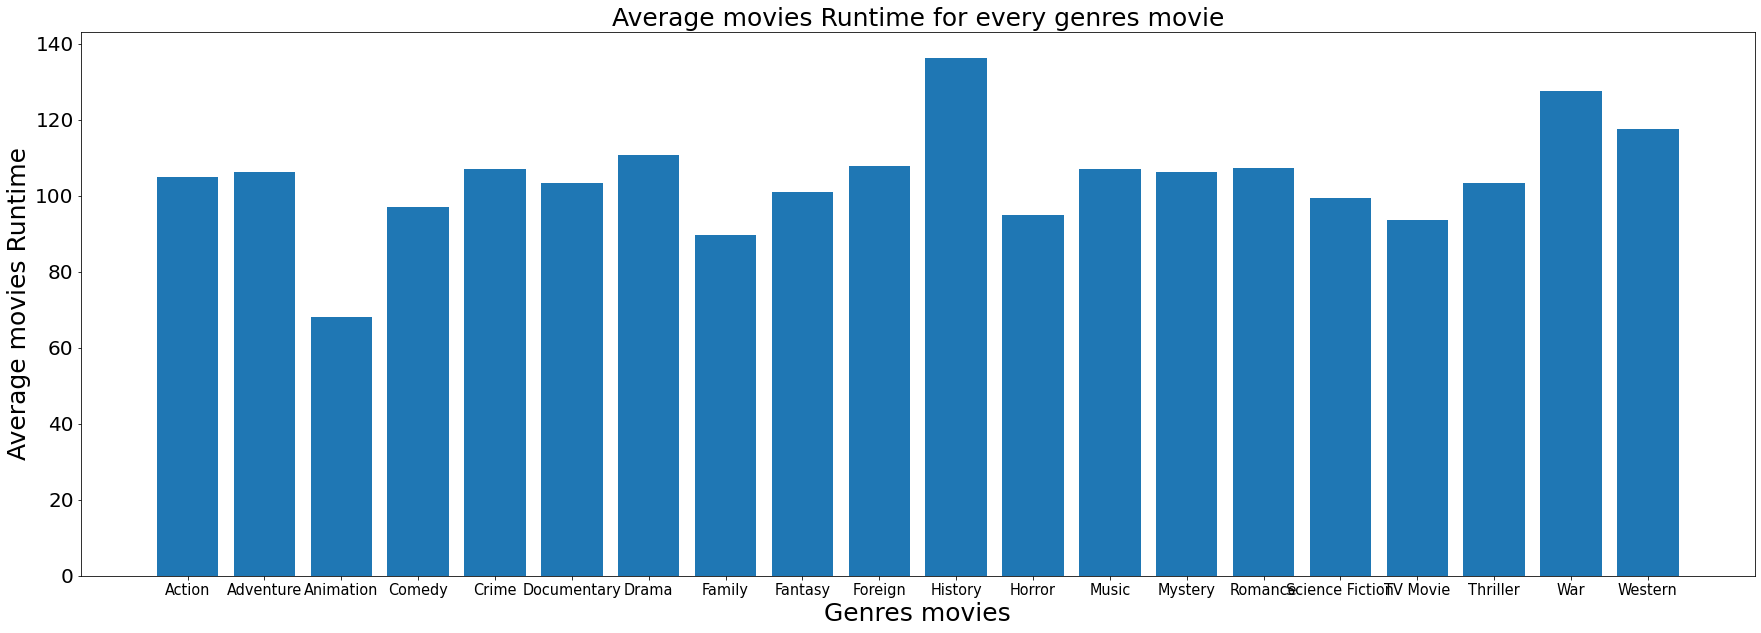

In [19]:
#show the result
show_bar(
    q5_df.index,
    q5_df['runtime_average'],
    "Genres movies",
    "Average movies Runtime",
    14.5,
    20,
    "Average movies Runtime for every genres movie"
)

### Question 6)  Who are the best duo of a certain movie genre like ('Comedy')?

In [20]:
#The genre that will research about them
genre = ['Comedy']

#take the columns that we nead
q6_df = df.loc[: , ['id', 'genres', 'cast', 'popularity']]

#explode genres and cast in dataframe and sort values by popularity to take the best
q6_df = q6_df.explode('genres')
q6_df = q6_df.explode('cast').sort_values('popularity', ascending=False)

q6_df = q6_df[q6_df['genres'].isin(genre)]

In [21]:
#calculate the duo of biggest popularity
#Note: will take some time to run
count = 0
dic = {}
rows = q6_df.shape[0]
for i, f in q6_df.iterrows():
    count +=1
    for j, s in q6_df.tail(rows - count).iterrows():
        #take Whose work with eachother
        if f['id'] == s['id']:
            dic[f"{f['cast']} & {s['cast']}"] = (dic.get(f"{f['cast']} & {s['cast']}", 0)) + (dic.get(f"{s['cast']} & {f['cast']}", 0)) +  + f['popularity']
        else:
            break

dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
cast = list(dic.keys())[0]

In [22]:
#print the result
print(f"The best duo of a {genre[0]} movies is: {cast}")

The best duo of a Comedy movies is: Owen Wilson & Ben Stiller


<a id='conclusions'></a>
## Conclusions

<h4>After analyzing the data that I chose to answer the questions, these were my answers:</h4>

<h6>1. What are the top 10 movies with certain keywords like ('police', 'kidnapping')?</h6>

<b>The answer:</b>
<p>
The top 10 movies with ['police', 'kidnapping']:
<ol>
    <li>Les 7 jours du talion</li>
    <p>
-> Overview: Bruno Hamel is a thirty eight year old surgeon. He lives in Drummondville with his wife Sylvie, and their eight year-old daughter Jasmine. Like many happy people, he is leading an uneventful life until a beautiful fall afternoon, when his daughter is raped and murdered. From then on, the world of the Hamel family collapses. When the murderer is arrested, a terrible project germinates in Bruno's darkened mind. He plans to capture the "monster" and make him pay for his crime. The day the murderer appears in Court, Hamel, who had prepared his plan in great detail, kidnaps the monster and later sends the police a brief message stating that the rapist and murderer of his daughter was going to be tortured for 7 days and then executed. Once this task accomplished, he will then give himself up.
</p>
    <br>
    <li>The Den</li>
    <p>
-> Overview: A young woman studying the habits of webcam chat users from the apparent safety of her apartment witnesses a brutal murder online and is quickly immersed in a nightmare in which she and her loved ones are targeted for the same grisly fate as the first victim.
    </p>
    <br>
    <li>Spooks: The Greater Good</li>
    <p>
-> Overview: During a handover to the head of counter-terrorism of MI5 Harry Pearce, terrorist Adam Qasim escapes from MI5 custody. When Harry disappears soon after, his protÃ©gÃ© Will Crombie is tasked with finding out what happened as an impending attack on London looms. Crombie eventually uncovers a deadly conspiracy.
    </p>
    <br>
    <li>12 Years a Slave</li>
    <p>
-> Overview: In the pre-Civil War United States, Solomon Northup, a free black man from upstate New York, is abducted and sold into slavery. Facing cruelty as well as unexpected kindnesses Solomon struggles not only to stay alive, but to retain his dignity. In the twelfth year of his unforgettable odyssey, Solomonâ€™s chance meeting with a Canadian abolitionist will forever alter his life.
    </p>
    <br>
    <li>Prisoners</li>
    <p>
-> Overview: When Keller Dover's daughter and her friend go missing, he takes matters into his own hands as the police pursue multiple leads and the pressure mounts. But just how far will this desperate father go to protect his family?
    </p>
    <br>
    <li>The Departed</li>
    <p>
-> Overview: To take down South Boston's Irish Mafia, the police send in one of their own to infiltrate the underworld, not realizing the syndicate has done likewise. While an undercover cop curries favor with the mob kingpin, a career criminal rises through the police ranks. But both sides soon discover there's a mole among them.
    </p>
    <br>
    <li>Wait Until Dark</li>
    <p>
-> Overview: After a flight back home, Sam Hendrix returns with a doll he innocently acquired along the way. As it turns out, the doll is actually stuffed with heroin, and a group of criminals led by the ruthless Roat has followed Hendrix back to his place to retrieve it. When Hendrix leaves for business, the crooks make their move -- and find his blind wife, Susy, alone in the apartment. Soon, a life-threatening game begins between Susy and the thugs.
    </p>
    <br>
    <li>Hot Fuzz</li>
    <p>
-> Overview: Top London cop, PC Nicholas Angel is good. Too good.  To stop the rest of his team from looking bad, he is reassigned to the quiet town of Sandford, paired with simple country cop, and everything seems quiet until two actors are found decapitated. It is addressed as an accident, but Angel isn't going to accept that, especially when more and more people turn up dead.
    </p>
    <br>
    <li>Logorama</li>
    <p>
-> Overview: Logorama's plot involves the adventures of two cops who are chasing an armed criminal through the streets of a fictionalized, stylized city. All characters and items throughout the film are depicted using real-life brand logos. The cops are portrayed as Michelin Men and the villain as Ronald McDonald.
    </p>
   <br>
    <li>Taken</li>
    <p>
-> Overview: While vacationing with a friend in Paris, an American girl is kidnapped by a gang of human traffickers intent on selling her into forced prostitution. Working against the clock, her ex-spy father must pull out all the stops to save her. But with his best years possibly behind him, the job may be more than he can handle.
    </p>  
</ol>
</p>
<h6>2. What are the top 10 production companies for the production of certain movie genre like ('Horror')?</h6>

<p>
    Best production_companies in Horror:
    <ol>
        <li>UW4 Productions (with Mean popularity 7.031452)</li>
        <li>Sketch Films (with Mean popularity 7.031452)</li>
        <li>Scholastic Entertainment (with Mean popularity 3.644541)</li>
        <li>Hasbro (with Mean popularity 3.489314)</li>
        <li>Animal Kingdom (with Mean popularity 3.393741)</li>
        <li>Northern Lights Films (with Mean popularity 3.393741)</li>
        <li>Two Flints (with Mean popularity 3.393741)</li>
        <li>New Legacy (with Mean popularity 3.326646)</li>
        <li>Dentsu (with Mean popularity 3.028769)</li>
        <li>Fuji Television Network (with Mean popularity 3.028769)</li>
    </ol>
</p>

_______________________________________________________

<h6>3. What is the best month to publish a certain movie genre like ('Action')?</h6>

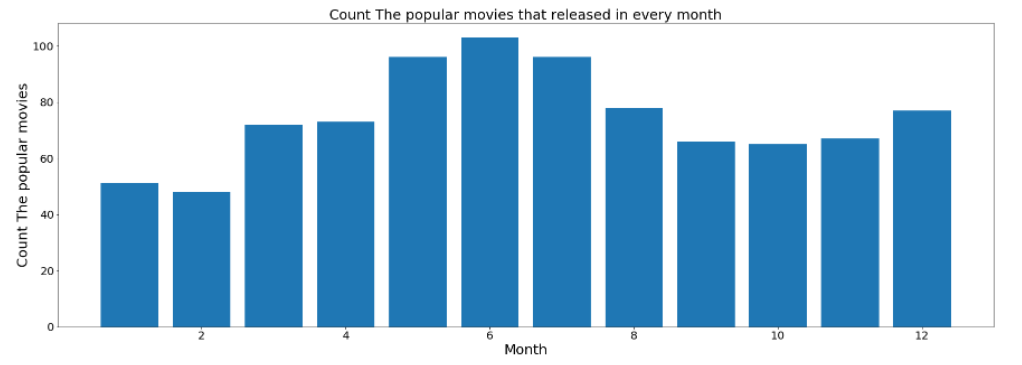

<ul>
    <li>The best month to publish a 'Action' movie is: <b>June</b>, Because it is the most successful month in which movies have been published.</li>
</ul>
<br>
_______________________________________________________

<h6>4. What is the level of movies over the years?</h6>

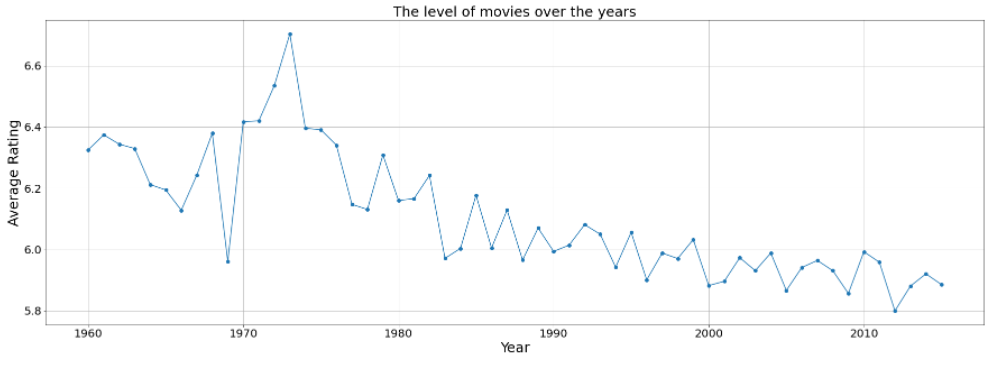

<ul>
    <li>We conclude that the years in which the most successful movies were shown is <b>1970s</b>.</li>
</ul>
<br>

_______________________________________________________

<h6>5. What is the movie genre that has the biggest runtime_average?</h6>

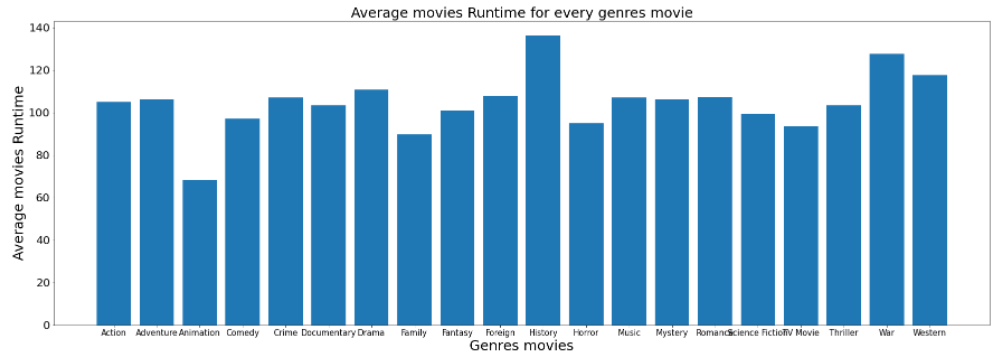

<ul>
    <li>the <b>history movies</b> that has the biggest runtime_average.</li>
</ul>
<br>

_______________________________________________________

<h6>6. Who are the best duo of a certain movie genre like ('Comedy')?</h6>
<ul>
    <li>The best duo of a Comedy movies is: <b>Owen Wilson & Ben Stiller</b>, Because they have the most popularity in which movies have been published.</li>
</ul>
<br>

<h3>Data Problems:</h3>

<ul>
    <li>The data was somewhat unrealistic, which gave me some illogical results.</li>
    <li>There were a lot of zero values especially in the budget_adj and revenue_adj columns, Which made me unable to use them.</li>
    <li>I could not use the homepage column because it is somewhat useless.</li>
    <li>There was a problem converting column release_date to datetime.</li>

</ul>

## Submitting your Project 


In [23]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])